In [157]:
import scipy as sp
import scipy.optimize as optimize
from scipy.optimize import minimize
import pandas as pd
import numpy as np
import sys
import os
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [158]:
# The formula
'p = (T_p*S - T_s(0.3*L_s_1 + 0.4*L_s_2 + 0.2*L_s_3 + 0.1*L_s_3)/1.2 - (0.35*L_g_1+0.45*L_g_2+0.2*L_g_3)*T_g/0.95'

'p = (T_p*S - T_s(0.3*L_s_1 + 0.4*L_s_2 + 0.2*L_s_3 + 0.1*L_s_3)/1.2 - (0.35*L_g_1+0.45*L_g_2+0.2*L_g_3)*T_g/0.95'

In [159]:
def injection(x):
    """The injection function"""

    L_g_1 = x[0]
    L_g_2 = x[1]
    L_g_3 = x[2]
    T_g = x[3]
    T_p = x[4]
    S = x[5]
    T_s = x[6]
    L_s_1 = x[7]
    L_s_2 = x[8]
    L_s_3 = x[9]
    L_s_4 = x[10]

    return (365*(0.35*L_g_1+0.45*L_g_2+0.2*L_g_3)*T_g/0.95 - 
            (T_p*S - 365*T_s*(0.3*L_s_1 + 0.4*L_s_2 + 0.2*L_s_3 + 0.1*L_s_4))/1.2)

In [160]:
# Solar injection with credit is capped at 130% of consumption
def constraint(x):
    return (1.1*365*(0.35*x[0]+0.45*x[1]+0.2*x[2])*x[3]/0.95 - (x[4]*x[5] - 365*x[6]*(0.3*x[7] + 0.4*x[8] + 0.2*x[9] + 0.1*x[10]))/1.2)
Con = {'type':'ineq', 'fun':constraint}
Cons = [Con]

In [161]:
# Factor: kWh/kWp; 12 month; number obtained from Helioscope
B_T_p = (1173,1263)

# Load charged by Grid
# Four Express 100
B_L_g_1 = (0, 65.4) #0.35
B_L_g_2 = (65.4, 123.1) #0.45
B_L_g_3 = (123.1, 238.5) #0.2

# Load charged by solar, bound
B_L_s_1 = (0,65.4) #0.3
B_L_s_2 = (65.4, 123.1) #0.4
B_L_s_3 = (123.1, 238.5) #0.2
B_L_s_4 = (238.5,388.5) #0.1
B_T_g = (2,10)

B_S_500 = (500,500)
B_S_520 = (520,520)
B_S_540 = (540,540)
B_S_560 = (560,560)
B_S_580 = (580,580)
B_S_600 = (600,600)
B_T_s = (0, 6)



# Scenario 1

In [162]:
ig_500_1 = [7.7,65.4,123.1, 5, 
          1250, 500,
         4, 65.4, 123.1, 238.5, 388.5]

Bounds_500 = [B_L_g_1 , B_L_g_2, B_L_g_3, B_T_g, 
          B_T_p, B_S_500,
          B_T_s, B_L_s_1, B_L_s_2, B_L_s_3, B_L_s_4]
sol_annual_500_1 = minimize(injection, ig_500_1, bounds=Bounds_500, constraints=Cons)
print('Result:', sol_annual_500_1.fun, '\nParameter Values:', sol_annual_500_1.x)

Result: -49031.52425386838 
Parameter Values: [  65.39738059  123.09663904  235.66694534    9.90364772 1263.
  500.            0.           60.39100405  116.42092751  235.16046253
  386.83053401]


In [163]:
ig_500_2 = [65.4,123.1,238.5, 5, 
          1190, 500,
         4, 7.7, 65.4, 123.1, 238.5]
sol_annual_500_2 = minimize(injection, ig_500_2, bounds=Bounds_500, constraints=Cons)
print('Result:', sol_annual_500_2.fun, '\nParameter Values:', sol_annual_500_2.x)

Result: -48667.21372137411 
Parameter Values: [6.52870024e+01 1.22965481e+02 2.38429773e+02 9.87500347e+00
 1.26295538e+03 5.00000000e+02 0.00000000e+00 8.45025887e-03
 6.54000000e+01 1.23100000e+02 2.38500000e+02]


In [164]:
ig_500_3 = [38.5,100,200, 5, 
          1220, 500,
         4, 38.5, 100, 200, 300]
sol_annual_500_3 = minimize(injection, ig_500_3, bounds=Bounds_500, constraints=Cons)
print('Result:', sol_annual_500_3.fun, '\nParameter Values:', sol_annual_500_3.x)

Result: -48767.65065979422 
Parameter Values: [  63.59690728  121.74411968  235.53435328    9.96449493 1257.77734747
  500.            0.           34.83207841   95.1094375   197.55471875
  298.77735908]


In [165]:
Bounds_520 = [B_L_g_1 , B_L_g_2, B_L_g_3, B_T_g,
          B_T_p, B_S_520,
          B_T_s, B_L_s_1, B_L_s_2, B_L_s_3, B_L_s_4]
ig_520_1 = [7.7,65.4,123.1, 5, 
          1190, 520,
         4, 65.4, 123.1, 238.5, 388.5]
sol_annual_520_1 = minimize(injection, ig_520_1, bounds=Bounds_520, constraints=Cons)
print('Result:', sol_annual_520_1.fun, '\nParameter Values:', sol_annual_520_1.x)

Result: -63252.36842105258 
Parameter Values: [  65.4  123.1  238.5   10.  1263.   520.     0.     0.    65.4  123.1
  238.5]


In [166]:
ig_520_2 = [65.4,123.1,238.5, 5, 
          1200, 520,
         4, 7.7, 65.4, 123.1, 238.5]
sol_annual_520_2 = minimize(injection, ig_520_2, bounds=Bounds_520, constraints=Cons)
print('Result:', sol_annual_520_2.fun, '\nParameter Values:', sol_annual_520_2.x)

Result: -48653.24624038936 
Parameter Values: [6.53999811e+01 1.23099976e+02 2.38499989e+02 9.99986490e+00
 1.22929516e+03 5.20000000e+02 1.35740330e-05 1.04202015e-04
 6.54251851e+01 1.23112593e+02 2.38506296e+02]


In [167]:
ig_520_3 = [38.5,100,200, 5, 
          1220, 520,
         4, 38.5, 100, 200, 300]
sol_annual_520_3 = minimize(injection, ig_520_3, bounds=Bounds_520, constraints=Cons)
print('Result:', sol_annual_520_3.fun, '\nParameter Values:', sol_annual_520_3.x)

Result: -63252.36842105258 
Parameter Values: [  65.4  123.1  238.5   10.  1263.   520.     0.     0.    65.4  123.1
  238.5]


In [168]:
Bounds_540 = [B_L_g_1 , B_L_g_2, B_L_g_3, B_T_g,
          B_T_p, B_S_540,
          B_T_s, B_L_s_1, B_L_s_2, B_L_s_3, B_L_s_4]
ig_540_1 = [7.7,65.4,123.1, 5, 
          1250, 540,
         4, 65.4, 123.1, 238.5, 388.5]
sol_annual_540_1 = minimize(injection, ig_540_1, bounds=Bounds_540, constraints=Cons)
print('Result:', sol_annual_540_1.fun, '\nParameter Values:', sol_annual_540_1.x)

Result: -78654.65692478296 
Parameter Values: [6.53720445e+01 1.23075336e+02 2.38450672e+02 9.99658037e+00
 1.25008787e+03 5.40000000e+02 2.56472418e-03 6.51261988e+01
 1.22809578e+02 2.37658000e+02 3.87606547e+02]


In [169]:
ig_540_2 = [65.4,123.1,238.5, 5, 
          1190, 540,
         4, 7.7, 65.4, 123.1, 238.5]
sol_annual_540_2 = minimize(injection, ig_540_2, bounds=Bounds_540, constraints=Cons)
print('Result:', sol_annual_540_2.fun, '\nParameter Values:', sol_annual_540_2.x)

Result: -49004.90425169747 
Parameter Values: [6.54000000e+01 1.23100000e+02 2.38500000e+02 1.00000000e+01
 1.19154259e+03 5.40000000e+02 1.34252642e-01 7.48592928e+00
 6.55093856e+01 1.23159502e+02 2.38529751e+02]


In [170]:
ig_540_3 = [38.5,100,200, 5, 
          1220, 540,
         4, 38.5, 100, 200, 300]
sol_annual_540_3 = minimize(injection, ig_540_3, bounds=Bounds_540, constraints=Cons)
print('Result:', sol_annual_540_3.fun, '\nParameter Values:', sol_annual_540_3.x)

Result: -66599.07461495069 
Parameter Values: [6.53394257e+01 1.23046557e+02 2.38393115e+02 9.99259029e+00
 1.22274299e+03 5.40000000e+02 5.55727935e-03 3.65318790e+01
 9.74111814e+01 1.98562577e+02 2.99280460e+02]


In [171]:
Bounds_560 = [B_L_g_1 , B_L_g_2, B_L_g_3, B_T_g,
          B_T_p, B_S_560,
          B_T_s, B_L_s_1, B_L_s_2, B_L_s_3, B_L_s_4]
ig_560_1 = [7.7,65.4,123.1, 5, 
          1250, 560,
         4, 65.4, 123.1, 238.5, 388.5]
sol_annual_560_1 = minimize(injection, ig_560_1, bounds=Bounds_560, constraints=Cons)
print('Result:', sol_annual_560_1.fun, '\nParameter Values:', sol_annual_560_1.x)


Result: -189970.53490157818 
Parameter Values: [  28.66532127   90.47613437  164.39428404    5.45357879 1208.83445967
  560.            4.21365472   65.23298279  122.94955765  238.23101516
  388.16744507]


In [172]:
ig_560_2 = [65.4,123.1,238.5, 5, 
          1190, 560,
         4, 7.7, 65.4, 123.1, 238.5]
sol_annual_560_2 = minimize(injection, ig_560_2, bounds=Bounds_560, constraints=Cons)
print('Result:', sol_annual_560_2.fun, '\nParameter Values:', sol_annual_560_2.x)

Result: -52877.49904058955 
Parameter Values: [6.52777129e+01 1.22992111e+02 2.38284221e+02 9.98093166e+00
 1.19559721e+03 5.60000000e+02 9.38604719e-01 7.29287896e+00
 6.88152320e+01 1.24976764e+02 2.39584488e+02]


In [173]:
ig_560_3 = [38.5,100,200, 5, 
          1220, 500,
         4, 38.5, 100, 200, 300]
sol_annual_560_3 = minimize(injection, ig_560_3, bounds=Bounds_560, constraints=Cons)
print('Result:', sol_annual_560_3.fun, '\nParameter Values:', sol_annual_560_3.x)

Result: -63357.38829337107 
Parameter Values: [6.53994105e+01 1.23099480e+02 2.38498960e+02 9.99992789e+00
 1.17300342e+03 5.60000000e+02 5.40834205e-05 6.53975170e+01
 1.23097809e+02 2.38495619e+02 3.88494305e+02]


In [174]:
Bounds_580 = [B_L_g_1 , B_L_g_2, B_L_g_3, B_T_g,
          B_T_p, B_S_580,
          B_T_s, B_L_s_1, B_L_s_2, B_L_s_3, B_L_s_4]
ig_580_1 = [7.7,65.4,123.1, 5, 
          1250, 580,
         4, 65.4, 123.1, 238.5, 388.5]
sol_annual_580_1 = minimize(injection, ig_580_1, bounds=Bounds_580, constraints=Cons)
print('Result:', sol_annual_580_1.fun, '\nParameter Values:', sol_annual_580_1.x)

Result: -127674.95775012515 
Parameter Values: [6.52443251e+01 1.22950507e+02 2.38208494e+02 9.97637374e+00
 1.26285880e+03 5.80000000e+02 1.11798453e-02 5.49712086e+01
 1.09195172e+02 2.31547519e+02 3.84869810e+02]


In [175]:
ig_580_2 = [65.4,123.1,238.5, 5, 
          1190, 580,
         4, 7.7, 65.4, 123.1, 238.5]
sol_annual_580_2 = minimize(injection, ig_580_2, bounds=Bounds_580, constraints=Cons)
print('Result:', sol_annual_580_2.fun, '\nParameter Values:', sol_annual_580_2.x)

Result: -48361.990707257995 
Parameter Values: [  65.4         123.1         238.5          10.         1195.05764408
  580.            1.90300898    7.20061349   67.83820307  124.37736326
  239.20080421]


In [176]:
ig_580_3 = [38.5,100,200, 5, 
          1220, 580,
         4, 38.5, 100, 200, 300]
sol_annual_580_3 = minimize(injection, ig_580_3, bounds=Bounds_580, constraints=Cons)
print('Result:', sol_annual_580_3.fun, '\nParameter Values:', sol_annual_580_3.x)

Result: -106653.04920525127 
Parameter Values: [6.53255244e+01 1.23034293e+02 2.38368586e+02 9.99088984e+00
 1.22109556e+03 5.80000000e+02 6.83262265e-03 3.76935732e+01
 9.89305030e+01 1.99423658e+02 2.99762745e+02]


In [177]:
Bounds_600 = [B_L_g_1 , B_L_g_2, B_L_g_3, B_T_g,
          B_T_p, B_S_600,
          B_T_s, B_L_s_1, B_L_s_2, B_L_s_3, B_L_s_4]

ig_600_1 = [7.7,65.4,123.1, 5, 
          1250, 600,
         4, 65.4, 123.1, 238.5, 388.5]

sol_annual_600_1 = minimize(injection, ig_600_1, bounds=Bounds_600, constraints=Cons)
print('Result:', sol_annual_600_1.fun, '\nParameter Values:', sol_annual_600_1.x)

Result: -130261.69284327602 
Parameter Values: [6.53468977e+01 1.23053150e+02 2.38406300e+02 9.99350431e+00
 1.25000293e+03 6.00000000e+02 2.37892604e-01 6.52190767e+01
 1.22903594e+02 2.38282975e+02 3.88260639e+02]


In [178]:
ig_600_2 = [65.4,123.1,238.5, 5, 
          1190, 600,
         4, 7.7, 65.4, 123.1, 238.5]
sol_annual_600_2 = minimize(injection, ig_600_2, bounds=Bounds_600, constraints=Cons)
print('Result:', sol_annual_600_2.fun, '\nParameter Values:', sol_annual_600_2.x)

Result: -49287.30898806703 
Parameter Values: [  65.3772652   123.07990223  238.4599998     9.99019894 1190.15635504
  600.            2.66119118    7.77080462   65.42124317  123.14057988
  238.55223853]


In [179]:
ig_600_3 = [38.5,100,207.7, 5, 
          1220, 600,
         4, 38.5, 100, 200, 300]
sol_annual_600_3 = minimize(injection, ig_600_3, bounds=Bounds_600, constraints=Cons)
print('Result:', sol_annual_600_3.fun, '\nParameter Values:', sol_annual_600_3.x)

Result: -126753.77463930467 
Parameter Values: [6.53517463e+01 1.23057428e+02 2.38414855e+02 9.99409740e+00
 1.22094907e+03 6.00000000e+02 4.42694804e-03 3.77792903e+01
 9.91238069e+01 1.99254515e+02 2.99525860e+02]


In [180]:
a = {'Nameplate':[500,520,540,560,580,600], 
    'Net Injection-1':[sol_annual_500_1.fun, sol_annual_520_1.fun, sol_annual_540_1.fun, sol_annual_560_1.fun,
                     sol_annual_580_1.fun, sol_annual_600_1.fun],
    'Net Injection-2':[sol_annual_500_2.fun, sol_annual_520_2.fun, sol_annual_540_2.fun, sol_annual_560_2.fun,
                     sol_annual_580_2.fun, sol_annual_600_2.fun],
    'Net Injection-3':[sol_annual_500_3.fun, sol_annual_520_3.fun, sol_annual_540_3.fun, sol_annual_560_3.fun,
                     sol_annual_580_3.fun, sol_annual_600_3.fun]}
data = pd.DataFrame(a)
data

,Nameplate,Net Injection-1,Net Injection-2,Net Injection-3
0,500,-49031.524254,-48667.213721,-48767.650660
1,520,-63252.368421,-48653.246240,-63252.368421
2,540,-78654.656925,-49004.904252,-66599.074615
3,560,-189970.534902,-52877.499041,-63357.388293
4,580,-127674.957750,-48361.990707,-106653.049205
5,600,-130261.692843,-49287.308988,-126753.774639


In [181]:
data['Net Injection-1'] = abs(data['Net Injection-1'])
data['Net Injection-2'] = abs(data['Net Injection-2'])
data['Net Injection-3'] = abs(data['Net Injection-3'])
data

,Nameplate,Net Injection-1,Net Injection-2,Net Injection-3
0,500,49031.524254,48667.213721,48767.650660
1,520,63252.368421,48653.246240,63252.368421
2,540,78654.656925,49004.904252,66599.074615
3,560,189970.534902,52877.499041,63357.388293
4,580,127674.957750,48361.990707,106653.049205
5,600,130261.692843,49287.308988,126753.774639


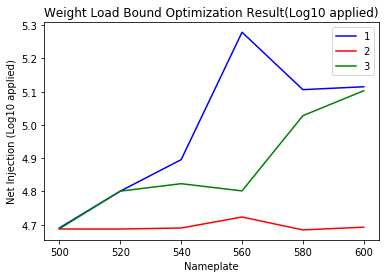

In [182]:
pl.plot(data['Nameplate'], np.log10(data['Net Injection-1']), '-', c='b',label='1')
pl.plot(data['Nameplate'], np.log10(data['Net Injection-2']), '-', c='r', label='2')
pl.plot(data['Nameplate'], np.log10(data['Net Injection-3']), '-', c='g', label='3')
pl.xlabel('Nameplate')
pl.ylabel('Net Injection (Log10 applied)')
pl.title('Weight Load Bound Optimization Result(Log10 applied)')
pl.legend()